In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math as math
import pandas as pd

In [42]:
# Our SEIAVRD Model

j = 1 # Choose subpopulation 1-5
t_max = 150 #Choose time interval

In [43]:
i_datalist = np.zeros(5)
d_datalist = np.zeros(5)
N_list = np.zeros(5)
r_votes_list = np.zeros(5)

N_list[0] = 29086766 #a1 initial population
N_list[1] = 131505862 #a2 initial population
N_list[2] = 62118607 #a3 initial population
N_list[3] = 83475174 #a4 initial population
N_list[4] = 19371663 #a5 initial population

# 0 cumulative cases by population
i_datalist[0] = 1.65e6
i_datalist[1] = 1.12e7
i_datalist[2] = 5.55e6
i_datalist[3] = 0.74e7
i_datalist[4] = 1.85e6

# 0 cumulative deaths by population
d_datalist[0] = 32300
d_datalist[1] = 195000
d_datalist[2] = 90000
d_datalist[3] = 127500
d_datalist[4] = 35500

r_votes_list[0] = .2 # % of 2020 trump votes
r_votes_list[1] = .4
r_votes_list[2] = .5
r_votes_list[3] = .7
r_votes_list[4] = .9

r_votes = r_votes_list[j-1]
# r_votes = .35 # or hard code specific value

i_data = i_datalist[j-1] # 0 cumulative cases in population of interest
d_data = d_datalist[j-1] # 0 cumulative deaths in population of interest

rho = 0.13013013013013014 # scaling factor for transmission rate estimation



# parameter values
t_incubation = 2.8 #time from exposed to to infected
v_incubation = 10.17 #time from vaccinated to vaccine activation, weighted average of pfizer, moderna, johnson&johnson
r_time = 9 #average covid recovery time

prop = (.553*N_list[0]+.531*N_list[1]+.490*N_list[2]+.422*N_list[3]+.347*N_list[4])/(N_list[0]+N_list[1]+N_list[2]+N_list[3]+N_list[4])

alpha = .92 # vaccine efficacy against infection, weighted average of pfizer, moderna, johnson&johnson
beta = 1/t_incubation # rate of emigration from exposed
mu_c = .00189 # death rate from infection without effective vaccination
mu = 715.2/100000 # natural death rate
nu = 0.0024988264652203583/prop # vaccination rate
lambdaa = 1/r_time # rate of asymptomatic to recovered
lambdai = 1/r_time # rate of infected to recovered
phi = 1/v_incubation # rate of vaccine activation
sigma = .35 # ratio of asymptomatic cases to all cases


N_list[0] = 29086766 #a1 initial population
N_list[1] = 131505862 #a2 initial population
N_list[2] = 62118607 #a3 initial population
N_list[3] = 83475174 #a4 initial population
N_list[4] = 19371663 #a5 initial population

N1=N_list[0]
N2=N_list[1]
N3=N_list[2]
N4=N_list[3]
N5=N_list[4]

N1_avg = N1/62
N2_avg = N2/355
N3_avg = N3/330
N4_avg = N4/1385
N5_avg = N5/983

N_tot = np.sum(N_list)

N = N_list[j-1] #population of interest

In [44]:
# Start with randomly generated mobility matrix

 # K = [[.924306, .037859, .019997, .011338, .006500],[.183433, .511133, .119763, .113481, .072190],[.041456, .060934, .773271, .074578, .049761],[.032418, .093286, .131840, .517380, .225077],[.002707, .011774, .021985, .082640, .880895]]

# Rows are origins, columns are destinations

N_mat = [[N_list[0], N_list[1], N_list[2], N_list[3], N_list[4]]]



In [45]:
# Eulerian Mobility Matrix

epsilon = 1

K = [[0/epsilon, .171165/epsilon, .042707/epsilon, .032537/epsilon, .004329/epsilon],[.040572/epsilon, 0/epsilon, .056572/epsilon, .072034/epsilon, .010634/epsilon],[.019411/epsilon, .128999/epsilon, 0/epsilon, .100218/epsilon, .015518/epsilon],[.011296/epsilon, .146962/epsilon, .098110/epsilon, 0/epsilon, .052232/epsilon],[.004064/epsilon, .079925/epsilon, .070498/epsilon, .356108/epsilon, 0/epsilon]]



# Rows are origins, columns are destinations

In [46]:

prop = (.553*N_list[0]+.531*N_list[1]+.490*N_list[2]+.422*N_list[3]+.347*N_list[4])/(N_list[0]+N_list[1]+N_list[2]+N_list[3]+N_list[4])



In [47]:
b1 = 0.553
b2 = 0.531
b3 = 0.490
b4 = 0.422
b5 = 0.347

gammai1 = rho/N_list[0] # rate of susceptibles exposed by infected
gammaa1 = .8*gammai1 # rate of susceptibles exposed by asymptomatic
gammavi1 = (1-alpha)*gammai1
gammava1 = (1-alpha)*gammaa1
theta1 = 11/1000*N_list[0] # natural birth rate
i01 = 17378.33
a01 = i01*sigma/(1-sigma)
e01 = (a01+i01)*t_incubation
v01 = .1*N_list[0]
r01 = 0
d01 = d_datalist[0] #cumulative total dead
c01 = i_datalist[0] #cumulative total symptomatic to fit to data
s01 = N1 - e01 - i01 - v01 - r01

gammai2 = rho/N_list[1] # rate of susceptibles exposed by infected
gammaa2 = .8*gammai2 # rate of susceptibles exposed by asymptomatic
gammavi2 = (1-alpha)*gammai2
gammava2 = (1-alpha)*gammaa2
theta2 = 11/1000*N_list[1] # natural birth rate
i02 = 125584.78
a02 = i02*sigma/(1-sigma)
e02 = (a02+i02)*t_incubation
v02 = .1*N_list[1]
r02 = 0
d02 = d_datalist[1] #cumulative total dead
c02 = i_datalist[1] #cumulative total symptomatic to fit to data
s02 = N2 - e02 - i02 - v02 - r02

gammai3 = rho/N_list[2] # rate of susceptibles exposed by infected
gammaa3 = .8*gammai3 # rate of susceptibles exposed by asymptomatic
gammavi3 = (1-alpha)*gammai3
gammava3 = (1-alpha)*gammaa3
theta3 = 11/1000*N_list[2] # natural birth rate
i03 = 63091.78
a03 = i03*sigma/(1-sigma)
e03 = (a03+i03)*t_incubation
v03 = .1*N_list[2]
r03 = 0
d03 = d_datalist[2] #cumulative total dead
c03 = i_datalist[2] #cumulative total symptomatic to fit to data
s03 = N3 - e03 - i03 - v03 - r03

gammai4 = rho/N_list[3] # rate of susceptibles exposed by infected
gammaa4 = .8*gammai4 # rate of susceptibles exposed by asymptomatic
gammavi4 = (1-alpha)*gammai4
gammava4 = (1-alpha)*gammaa4
theta4 = 11/1000*N_list[3] # natural birth rate
i04 = 84349.83
a04 = i04*sigma/(1-sigma)
e04 = (a04+i04)*t_incubation
v04 = .1*N_list[3]
r04 = 0
d04 = d_datalist[3] #cumulative total dead
c04 = i_datalist[3] #cumulative total symptomatic to fit to data
s04 = N4 - e04 - i04 - v04 - r04

gammai5 = rho/N_list[4] # rate of susceptibles exposed by infected
gammaa5 = .8*gammai5 # rate of susceptibles exposed by asymptomatic
gammavi5 = (1-alpha)*gammai5
gammava5 = (1-alpha)*gammaa5
theta5 = 11/1000*N_list[4] # natural birth rate
i05 = 20656.42
a05 = i05*sigma/(1-sigma)
e05 = (a05+i05)*t_incubation
v05 = .1*N_list[4]
r05 = 0
d05 = d_datalist[4] #cumulative total dead
c05 = i_datalist[4] #cumulative total symptomatic to fit to data
s05 = N5 - e05 - i05 - v05 - r05

In [48]:
# Our SEIAVR model

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Define your model function
def modelcd(x, t, b1, b2, b3, b4, b5, beta, gammaa1, gammai1, gammava1, gammavi1, gammaa2, gammai2, gammava2, gammavi2,
           gammaa3, gammai3, gammava3, gammavi3, gammaa4, gammai4, gammava4, gammavi4, gammaa5, gammai5, gammava5,
           gammavi5, lambdaa, lambdai, mu, mu_c, nu, phi, sigma, theta1, theta2, theta3, theta4, theta5):
    s1, e1, i1, a1, v1, r1, d1, c1, s2, e2, i2, a2, v2, r2, d2, c2, s3, e3, i3, a3, v3, r3, d3, c3, s4, e4, i4, a4, v4, r4, d4, c4, s5, e5, i5, a5, v5, r5, d5, c5 = x

    ds1dt = theta1 - gammai1 * s1 * i1 - nu * b1 * s1 - gammaa1 * s1 * a1 - mu * s1 + (K[1][0]*s2 + K[2][0]*s3 + K[3][0]*s4 + K[4][0]*s5) - (K[0][1]*s1 + K[0][2]*s1 + K[0][3]*s1 + K[0][4]*s1)
    de1dt = gammai1 * s1 * i1 + gammaa1 * s1 * a1 - beta * e1 + gammavi1 * v1 * i1 + gammava1 * v1 * a1 - mu * e1 + (K[1][0]*e2 + K[2][0]*e3 + K[3][0]*e4 + K[4][0]*e5) - (K[0][1]*e1 + K[0][2]*e1 + K[0][3]*e1 + K[0][4]*e1)
    di1dt = (1 - sigma) * beta * e1 - mu_c * i1 - lambdai * i1 - mu * i1 + (K[1][0]*i2 + K[2][0]*i3 + K[3][0]*i4 + K[4][0]*i5) - (K[0][1]*i1 + K[0][2]*i1 + K[0][3]*i1 + K[0][4]*i1)
    da1dt = sigma * beta * e1 - lambdaa * a1 - mu * a1 + (K[1][0]*a2 + K[2][0]*a3 + K[3][0]*a4 + K[4][0]*a5) - (K[0][1]*a1 + K[0][2]*a1 + K[0][3]*a1 + K[0][4]*a1)
    dv1dt = nu * b1 * s1 - phi * v1 - gammavi1 * v1 * i1 - gammava1 * v1 * a1 - mu * v1 + (K[1][0]*v2 + K[2][0]*v3 + K[3][0]*v4 + K[4][0]*v5) - (K[0][1]*v1 + K[0][2]*v1 + K[0][3]*v1 + K[0][4]*v1)
    dr1dt = lambdaa * a1 + lambdai * i1 + phi * v1 - mu * r1 + (K[1][0]*r2 + K[2][0]*r3 + K[3][0]*r4 + K[4][0]*r5) - (K[0][1]*r1 + K[0][2]*r1 + K[0][3]*r1 + K[0][4]*r1)
    dd1dt = mu_c * i1
    dc1dt = (1 - sigma) * beta * e1

    ds2dt = theta2 - gammai2 * s2 * i2 - nu * b2 * s2 - gammaa2 * s2 * a2 - mu * s2 + (K[0][1]*s1 + K[2][1]*s3 + K[3][1]*s4 + K[4][1]*s5) - (K[1][0]*s2 + K[1][2]*s2 + K[1][3]*s2 + K[1][4]*s2)
    de2dt = gammai2 * s2 * i2 + gammaa2 * s2 * a2 - beta * e2 + gammavi2 * v2 * i2 + gammava2 * v2 * a2 - mu * e2 + (K[0][1]*e1 + K[2][1]*e3 + K[3][1]*e4 + K[4][1]*e5) - (K[1][0]*e2 + K[1][2]*e2 + K[1][3]*e2 + K[1][4]*e2)
    di2dt = (1 - sigma) * beta * e2 - mu_c * i2 - lambdai * i2 - mu * i2 + (K[0][1]*i1 + K[2][1]*i3 + K[3][1]*i4 + K[4][1]*i5) - (K[1][0]*i2 + K[1][2]*i2 + K[1][3]*i2 + K[1][4]*i2)
    da2dt = sigma * beta * e2 - lambdaa * a2 - mu * a2 + (K[0][1]*a1 + K[2][1]*a3 + K[3][1]*a4 + K[4][1]*a5) - (K[1][0]*a2 + K[1][2]*a2 + K[1][3]*a2 + K[1][4]*a2)
    dv2dt = nu * b2 * s2 - phi * v2 - gammavi2 * v2 * i2 - gammava2 * v2 * a2 - mu * v2 + (K[0][1]*v1 + K[2][1]*v3 + K[3][1]*v4 + K[4][1]*v5) - (K[1][0]*v2 + K[1][2]*v2 + K[1][3]*v2 + K[1][4]*v2)
    dr2dt = lambdaa * a2 + lambdai * i2 + phi * v2 - mu * r2 + (K[0][1]*r1 + K[2][1]*r3 + K[3][1]*r4 + K[4][1]*r5) - (K[1][0]*r2 + K[1][2]*r2 + K[1][3]*r2 + K[1][4]*r2)
    dd2dt = mu_c * i2
    dc2dt = (1 - sigma) * beta * e2

    ds3dt = theta3 - gammai3 * s3 * i3 - nu * b3 * s3 - gammaa3 * s3 * a3 - mu * s3 + (K[0][2]*s1 + K[1][2]*s2 + K[3][2]*s4 + K[4][2]*s5) - (K[2][0]*s3 + K[2][1]*s3 + K[2][3]*s3 + K[2][4]*s3)
    de3dt = gammai3 * s3 * i3 + gammaa3 * s3 * a3 - beta * e3 + gammavi3 * v3 * i3 + gammava3 * v3 * a3 - mu * e3 + (K[0][2]*e1 + K[1][2]*e2 + K[3][2]*e4 + K[4][2]*e5) - (K[2][0]*e3 + K[2][1]*e3 + K[2][3]*e3 + K[2][4]*e3)
    di3dt = (1 - sigma) * beta * e3 - mu_c * i3 - lambdai * i3 - mu * i3 + (K[0][2]*i1 + K[1][2]*i2 + K[3][2]*i4 + K[4][2]*i5) - (K[2][0]*i3 + K[2][1]*i3 + K[2][3]*i3 + K[2][4]*i3)
    da3dt = sigma * beta * e3 - lambdaa * a3 - mu * a3 + (K[0][2]*a1 + K[1][2]*a2 + K[3][2]*a4 + K[4][2]*a5) - (K[2][0]*a3 + K[2][1]*a3 + K[2][3]*a3 + K[2][4]*a3)
    dv3dt = nu * b3 * s3 - phi * v3 - gammavi3 * v3 * i3 - gammava3 * v3 * a3 - mu * v3  + (K[0][2]*v1 + K[1][2]*v2 + K[3][2]*v4 + K[4][2]*v5) - (K[2][0]*v3 + K[2][1]*v3 + K[2][3]*v3 + K[2][4]*v3)
    dr3dt = lambdaa * a3 + lambdai * i3 + phi * v3 - mu * r3 + (K[0][2]*r1 + K[1][2]*r2 + K[3][2]*r4 + K[4][2]*r5) - (K[2][0]*r3 + K[2][1]*r3 + K[2][3]*r3 + K[2][4]*r3)
    dd3dt = mu_c * i3
    dc3dt = (1 - sigma) * beta * e3

    ds4dt = theta4 - gammai4 * s4 * i4 - nu * b4 * s4 - gammaa4 * s4 * a4 - mu * s4 + (K[0][3]*s1 + K[1][3]*s2 + K[2][3]*s3 + K[4][3]*s5) - (K[3][0]*s4 + K[3][1]*s4 + K[3][2]*s4 + K[3][4]*s4)
    de4dt = gammai4 * s4 * i4 + gammaa4 * s4 * a4 - beta * e4 + gammavi4 * v4 * i4 + gammava4 * v4 * a4 - mu * e4 + (K[0][3]*e1 + K[1][3]*e2 + K[2][3]*e3 + K[4][3]*e5) - (K[3][0]*e4 + K[3][1]*e4 + K[3][2]*e4 + K[3][4]*e4)
    di4dt = (1 - sigma) * beta * e4 - mu_c * i4 - lambdai * i4 - mu * i4 + (K[0][3]*i1 + K[1][3]*i2 + K[2][3]*i3 + K[4][3]*i5) - (K[3][0]*i4 + K[3][1]*i4 + K[3][2]*i4 + K[3][4]*i4)
    da4dt = sigma * beta * e4 - lambdaa * a4 - mu * a4 + (K[0][3]*a1 + K[1][3]*a2 + K[2][3]*a3 + K[4][3]*a5) - (K[3][0]*a4 + K[3][1]*a4 + K[3][2]*a4 + K[3][4]*a4)
    dv4dt = nu * b4 * s4 - phi * v4 - gammavi4 * v4 * i4 - gammava4 * v4 * a4 - mu * v4 + (K[0][3]*v1 + K[1][3]*v2 + K[2][3]*v3 + K[4][3]*v5) - (K[3][0]*v4 + K[3][1]*v4 + K[3][2]*v4 + K[3][4]*v4)
    dr4dt = lambdaa * a4 + lambdai * i4 + phi * v4 - mu * r4 + (K[0][3]*r1 + K[1][3]*r2 + K[2][3]*r3 + K[4][3]*r5) - (K[3][0]*r4 + K[3][1]*r4 + K[3][2]*r4 + K[3][4]*r4)
    dd4dt = mu_c * i4
    dc4dt = (1 - sigma) * beta * e4

    ds5dt = theta5 - gammai5 * s5 * i5 - nu * b5 * s5 - gammaa5 * s5 * a5 - mu * s5 + (K[0][4]*s1 + K[1][4]*s2 + K[2][4]*s3 + K[3][4]*s4) - (K[4][0]*s5 + K[4][1]*s5 + K[4][2]*s5 + K[4][3]*s5)
    de5dt = gammai5 * s5 * i5 + gammaa5 * s5 * a5 - beta * e5 + gammavi5 * v5 * i5 + gammava5 * v5 * a5 - mu * e5 + (K[0][4]*e1 + K[1][4]*e2 + K[2][4]*e3 + K[3][4]*e4) - (K[4][0]*e5 + K[4][1]*e5 + K[4][2]*e5 + K[4][3]*e5)
    di5dt = (1 - sigma) * beta * e5 - mu_c * i5 - lambdai * i5 - mu * i5 + (K[0][4]*i1 + K[1][4]*i2 + K[2][4]*i3 + K[3][4]*i4) - (K[4][0]*i5 + K[4][1]*i5 + K[4][2]*i5 + K[4][3]*i5)
    da5dt = sigma * beta * e5 - lambdaa * a5 - mu * a5 + (K[0][4]*a1 + K[1][4]*a2 + K[2][4]*a3 + K[3][4]*a4) - (K[4][0]*a5 + K[4][1]*a5 + K[4][2]*a5 + K[4][3]*a5)
    dv5dt = nu * b5 * s5 - phi * v5 - gammavi5 * v5 * i5 - gammava5 * v5 * a5 - mu * v5 + (K[0][4]*v1 + K[1][4]*v2 + K[2][4]*v3 + K[3][4]*v4) - (K[4][0]*v5 + K[4][1]*v5 + K[4][2]*v5 + K[4][3]*v5)
    dr5dt = lambdaa * a5 + lambdai * i5 + phi * v5 - mu * r5 + (K[0][4]*r1 + K[1][4]*r2 + K[2][4]*r3 + K[3][4]*r4) - (K[4][0]*r5 + K[4][1]*r5 + K[4][2]*r5 + K[4][3]*r5)
    dd5dt = mu_c * i5
    dc5dt = (1 - sigma) * beta * e5

    return [ds1dt, de1dt, di1dt, da1dt, dv1dt, dr1dt, dd1dt, dc1dt,
            ds2dt, de2dt, di2dt, da2dt, dv2dt, dr2dt, dd2dt, dc2dt,
            ds3dt, de3dt, di3dt, da3dt, dv3dt, dr3dt, dd3dt, dc3dt,
            ds4dt, de4dt, di4dt, da4dt, dv4dt, dr4dt, dd4dt, dc4dt,
            ds5dt, de5dt, di5dt, da5dt, dv5dt, dr5dt, dd5dt, dc5dt]

t = np.linspace(0, t_max, t_max+1, dtype = int)

# Define parameters with example values
x0 = s01, e01, i01, a01, v01, r01, d01, c01, s02, e02, i02, a02, v02, r02, d02, c02, s03, e03, i03, a03, v03, r03, d03, c03, s04, e04, i04, a04, v04, r04, d04, c04, s05, e05, i05, a05, v05, r05, d05, c05
parameters = [b1, b2, b3, b4, b5, beta, gammaa1, gammai1, gammava1, gammavi1,
          gammaa2, gammai2, gammava2, gammavi2, gammaa3, gammai3, gammava3, gammavi3,
          gammaa4, gammai4, gammava4, gammavi4, gammaa5, gammai5, gammava5, gammavi5,
          lambdaa, lambdai, mu, mu_c, nu, phi, sigma, theta1, theta2, theta3, theta4, theta5]

# Call odeint with parameters
soln = odeint(modelcd, x0, t, args=(*parameters,))
#s, e, i, a, v, r, d, c = soln.T
s1, e1, i1, a1, v1, r1, d1, c1, s2, e2, i2, a2, v2, r2, d2, c2, s3, e3, i3, a3, v3, r3, d3, c3, s4, e4, i4, a4, v4, r4, d4, c4, s5, e5, i5, a5, v5, r5, d5, c5 = soln.T


Results for A1


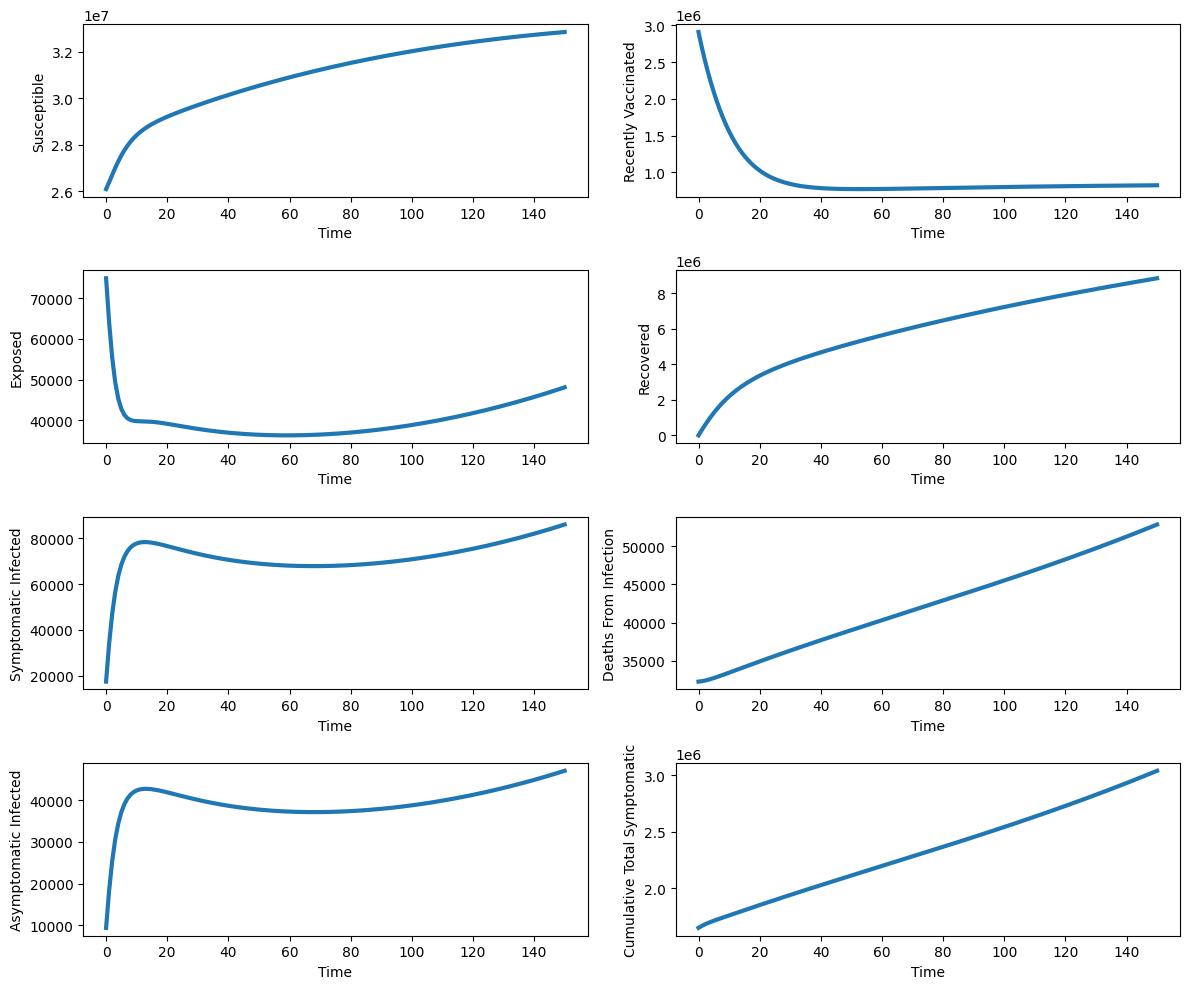

In [49]:


def plotdata(t, s, e, i, a, v, r, d, c):
    # plot the data
    fig, ax=plt.subplots(4,2,figsize=(12,10))



    ax[0,0].plot(t, s, lw=3, label='Susceptible')
    ax[0,0].set_xlabel('Time');
    ax[0,0].set_ylabel('Susceptible');

    ax[1,0].plot(t, e, lw=3, label='Exposed')
    ax[1,0].set_xlabel('Time');
    ax[1,0].set_ylabel('Exposed');

    ax[2,0].plot(t, i, lw=3, label='Symptomatic Infected')
    ax[2,0].set_xlabel('Time');
    ax[2,0].set_ylabel('Symptomatic Infected');

    ax[3,0].plot(t, a, lw=3, label='Asymptomatic Infected')
    ax[3,0].set_xlabel('Time');
    ax[3,0].set_ylabel('Asymptomatic Infected');

    ax[0,1].plot(t, v, lw=3, label='Recently Vaccinated')
    ax[0,1].set_xlabel('Time');
    ax[0,1].set_ylabel('Recently Vaccinated');

    ax[1,1].plot(t, r, lw=3, label='Recovered')
    ax[1,1].set_xlabel('Time');
    ax[1,1].set_ylabel('Recovered');

    ax[3,1].plot(t, c, lw=3, label='Cumultative Total Symptomatic')
    ax[3,1].set_xlabel('Time');
    ax[3,1].set_ylabel('Cumulative Total Symptomatic');

    ax[2,1].plot(t, d, lw=3, label='Deaths From Infection')
    ax[2,1].set_xlabel('Time');
    ax[2,1].set_ylabel('Deaths From Infection');



    plt.tight_layout()

# Plot the results FIX THIS PART, also make sure that the figures actually look right lol
print('Results for A1')
plotdata(t, s1, e1, i1, a1, v1, r1, d1, c1)

Results for A2


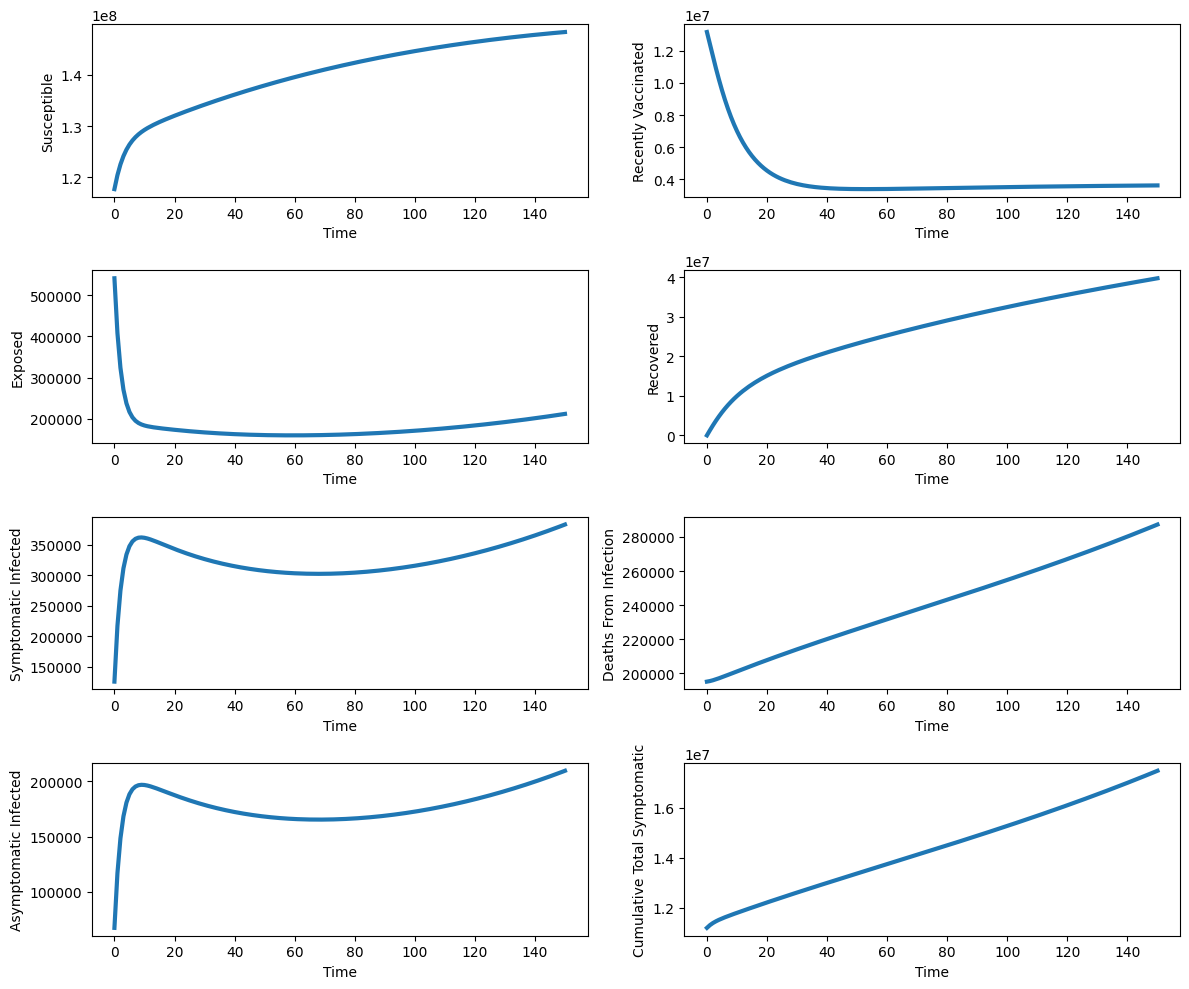

In [50]:
print('Results for A2')
plotdata(t, s2, e2, i2, a2, v2, r2, d2, c2)

Results for A3


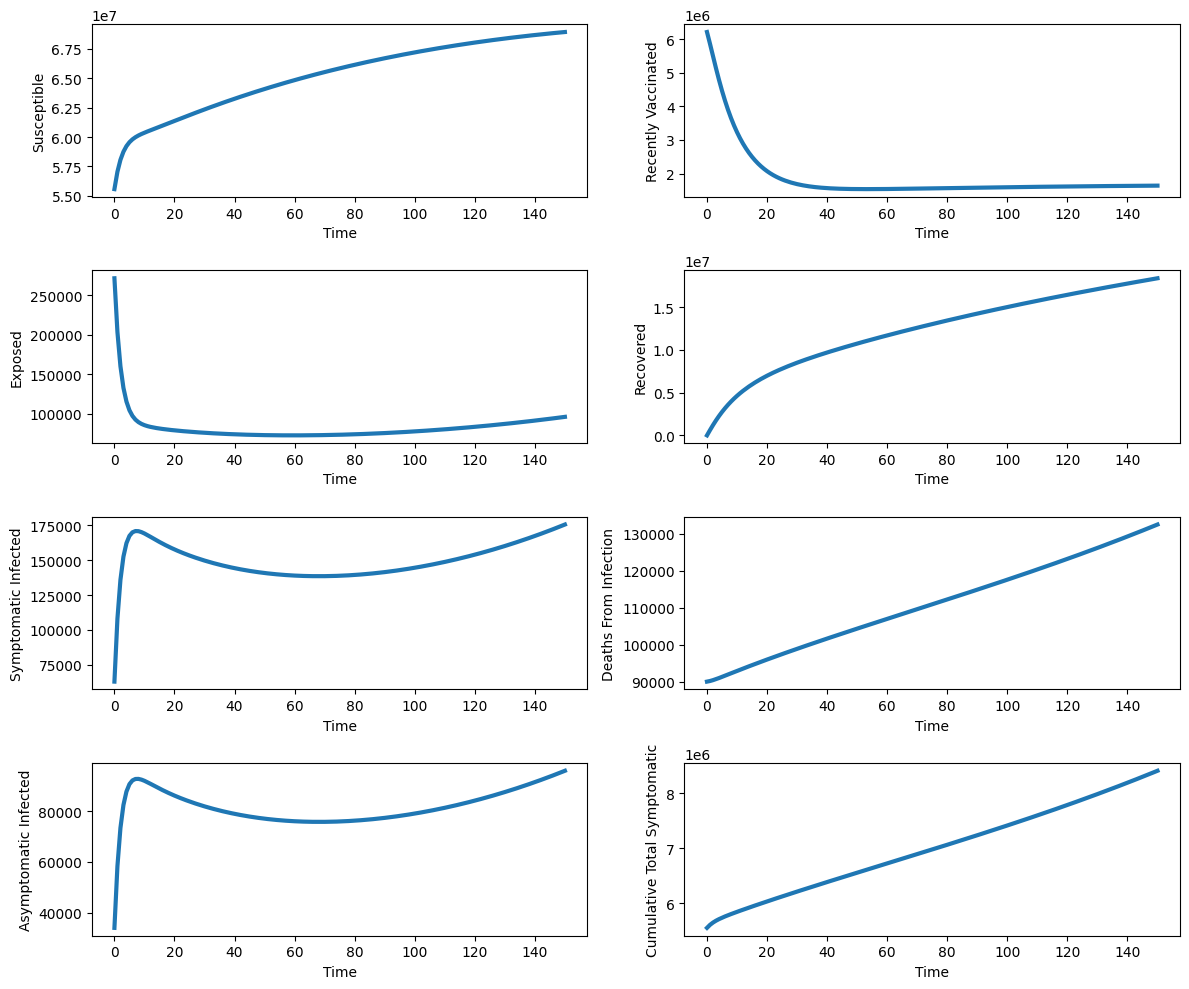

In [51]:
print('Results for A3')
plotdata(t, s3, e3, i3, a3, v3, r3, d3, c3)

Results for A4


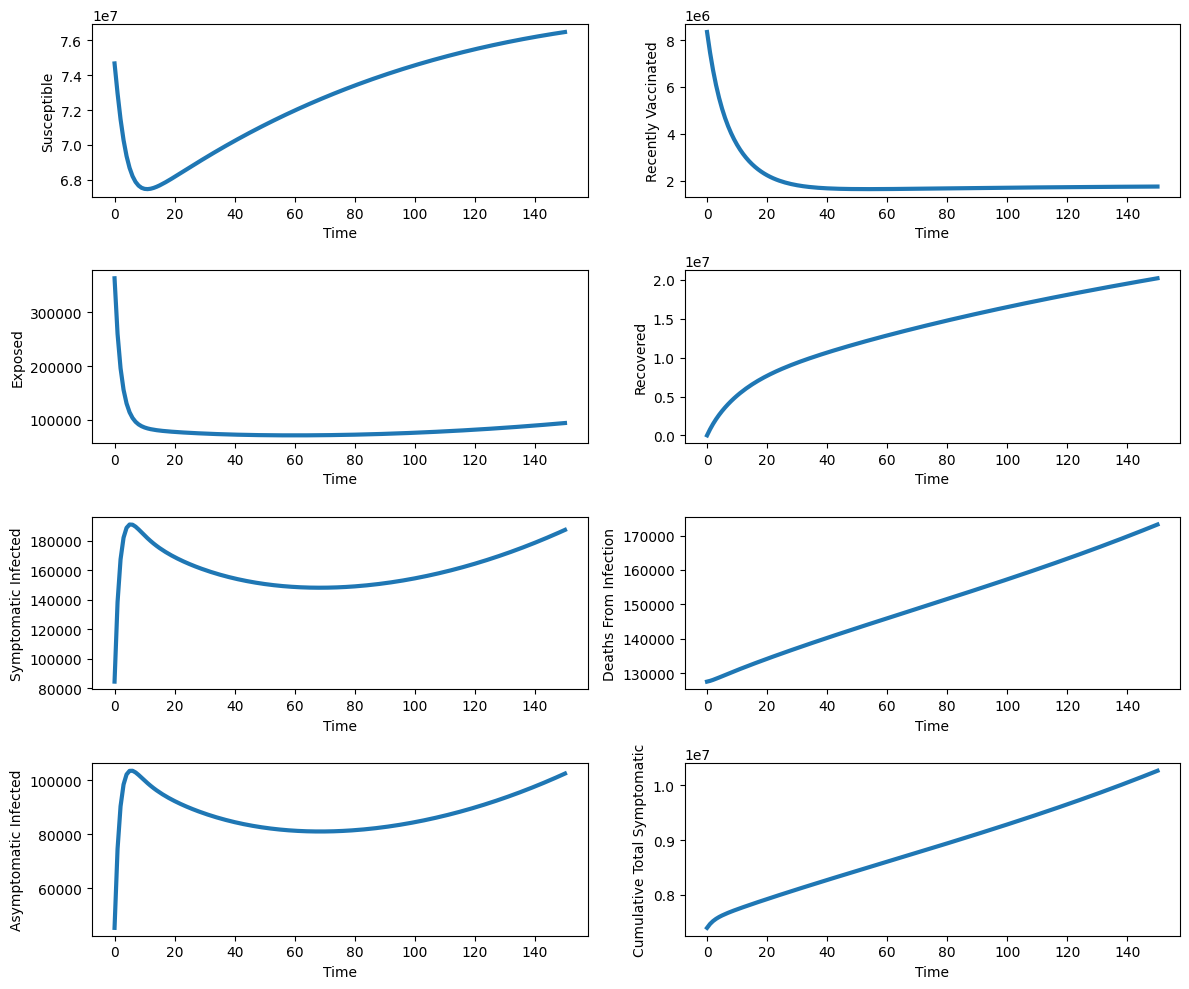

In [52]:
print('Results for A4')
plotdata(t, s4, e4, i4, a4, v4, r4, d4, c4)

Results for A5


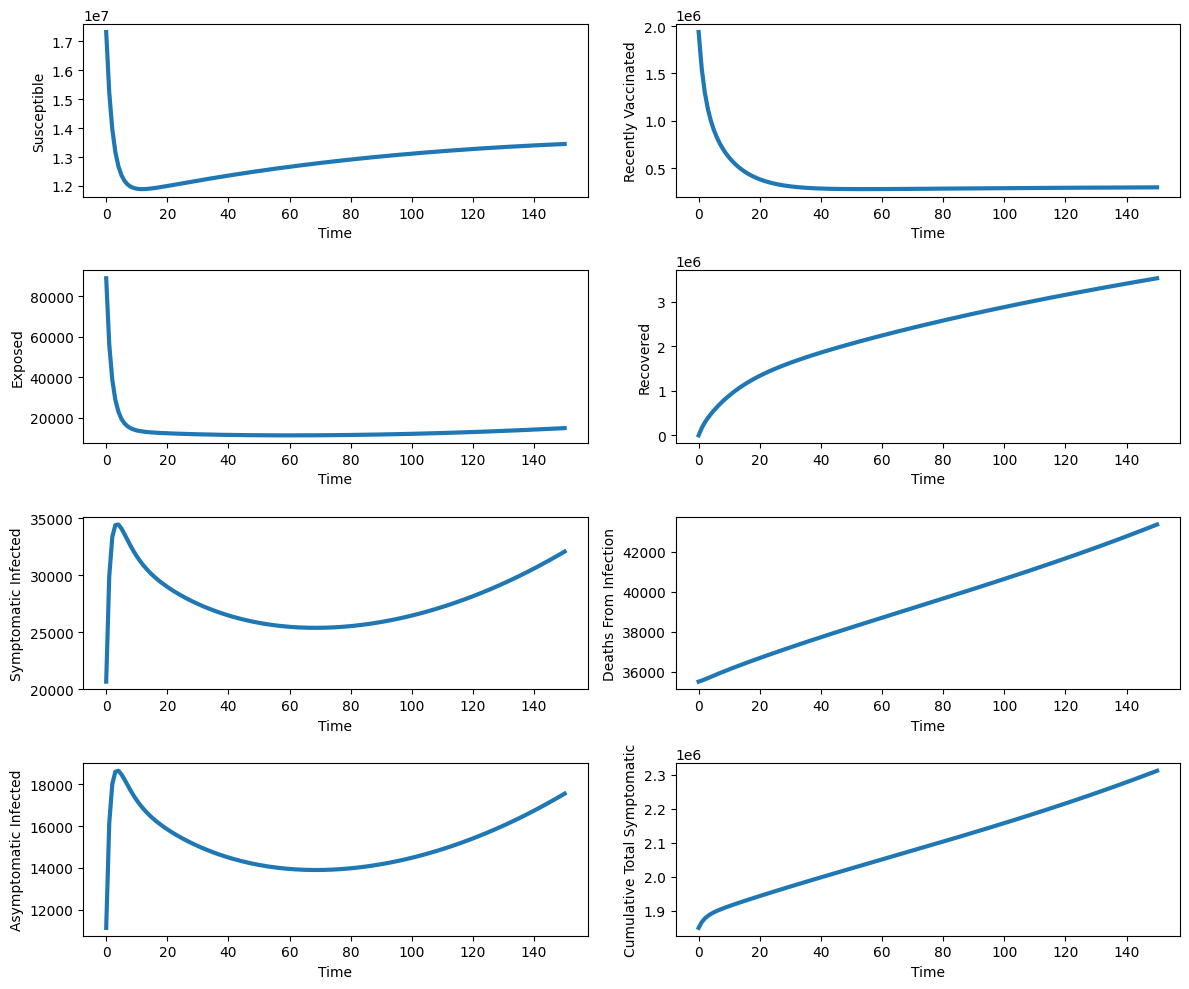

In [53]:
print('Results for A5')
plotdata(t, s5, e5, i5, a5, v5, r5, d5, c5)

In [54]:
#Parameter Estimation
import pandas as pd

import scipy.optimize as optimize
from scipy.optimize import least_squares
from scipy.stats import poisson
from scipy.stats import norm

In [55]:
qdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/us-counties-2021.csv')
qdf['county'] = qdf['county'].str.lower()
qdf['state'] = qdf['state'].str.lower()
qdf['county_state'] = qdf['county'] + '-' + qdf['state']
print("Total counties including Alaska and Hawaii after concatenating state & county US counites:", len(qdf['county_state'].unique()))
qdf['date'] = pd.to_datetime(qdf['date'], errors='coerce')

qdf = qdf.dropna(subset=['date'])

start_date = '2021-03-01'
end_date = '2021-09-01'

date_filtered_data = qdf[(qdf['date'] >= start_date) & (qdf['date'] <= end_date)]

vdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/2020 Election Voting by County csv.csv')
vdf = vdf[~vdf['state'].isin(['alaska', 'hawaii'])]
vdf['name'] = vdf['name'].str.lower()
vdf['state'] = vdf['state'].str.lower()
vdf['name_state'] = vdf['name'] + '-' + vdf['state']
vdf['trumpd_votes_ratio'] = vdf['results_trumpd'] / vdf['votes']
print("Total counties including Alaska and Hawaii after concatenating state & county Voting:", len(vdf['name_state'].unique()))

Total counties including Alaska and Hawaii after concatenating state & county US counites: 3262
Total counties including Alaska and Hawaii after concatenating state & county Voting: 3115


In [56]:
# Categorize counties into a1 to a5 based on Trump vote ratios
a1, a2, a3, a4, a5 = [], [], [], [], []

for _, row in vdf.iterrows():
    county = row['fips']
    ratio = row['trumpd_votes_ratio']
    if ratio <= 0.25:
        a1.append(county)
    elif 0.25 <= ratio < 0.45:
        a2.append(county)
    elif 0.45 <= ratio < 0.55:
        a3.append(county)
    elif 0.55 <= ratio < 0.75:
        a4.append(county)
    else:
        a5.append(county)

# Print counts of counties in each category
print("a1:", len(a1))
print("a2:", len(a2))
print("a3:", len(a3))
print("a4:", len(a4))
print("a5:", len(a5))
print("Total Counites:",len(a1)+len(a2)+len(a3)+len(a4)+len(a5))

a1: 62
a2: 355
a3: 330
a4: 1385
a5: 983
Total Counites: 3115


In [57]:
def aggregate_category_data(category, category_counties):
    # Filter COVID-19 data for counties in the category
    category_data = date_filtered_data[date_filtered_data['fips'].isin(category_counties)]

    # Group by date and aggregate cases and deaths
    category_aggregated = category_data.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

    # Return the aggregated data
    return category_aggregated

# Aggregate data for each category
category_a1_data = aggregate_category_data('a1', a1)
category_a2_data = aggregate_category_data('a2', a2)
category_a3_data = aggregate_category_data('a3', a3)
category_a4_data = aggregate_category_data('a4', a4)
category_a5_data = aggregate_category_data('a5', a5)

# Now you can access the aggregated data for each category
print(category_a1_data.head())
print(category_a2_data.head())
print(category_a3_data.head())
print(category_a4_data.head())
print(category_a5_data.head())


        date    cases   deaths
0 2021-03-01  1655613  32261.0
1 2021-03-02  1658001  32357.0
2 2021-03-03  1661465  32478.0
3 2021-03-04  1665006  32566.0
4 2021-03-05  1668306  32629.0
        date     cases    deaths
0 2021-03-01  11158967  194746.0
1 2021-03-02  11182148  195384.0
2 2021-03-03  11209293  196360.0
3 2021-03-04  11235460  197215.0
4 2021-03-05  11260993  198195.0
        date    cases   deaths
0 2021-03-01  5554198  89576.0
1 2021-03-02  5566852  89877.0
2 2021-03-03  5580508  90271.0
3 2021-03-04  5593619  90598.0
4 2021-03-05  5607018  91005.0
        date    cases    deaths
0 2021-03-01  7394784  127763.0
1 2021-03-02  7407994  127938.0
2 2021-03-03  7424610  128524.0
3 2021-03-04  7440441  129028.0
4 2021-03-05  7455677  129816.0
        date    cases   deaths
0 2021-03-01  1844362  35454.0
1 2021-03-02  1846091  35488.0
2 2021-03-03  1849820  35652.0
3 2021-03-04  1853531  35760.0
4 2021-03-05  1856346  35929.0


In [58]:
category_a1_data

,date,cases,deaths
0,2021-03-01,1655613,32261.0
1,2021-03-02,1658001,32357.0
2,2021-03-03,1661465,32478.0
3,2021-03-04,1665006,32566.0
4,2021-03-05,1668306,32629.0
...,...,...,...
180,2021-08-28,2177504,38057.0
181,2021-08-29,2179686,38061.0
182,2021-08-30,2190782,38083.0
183,2021-08-31,2196041,38121.0


In [59]:
times_list = np.zeros((int(t[len(t)-1]),5))
case_data_list = np.zeros((int(t[len(t)-1]),5))
death_data_list = np.zeros((int(t[len(t)-1]),5))

times_list[:,0]= category_a1_data['date'].index[0:t_max] #time data points a1
case_data_list[:,0] = category_a1_data['cases'][0:t_max] #cases data points a1
death_data_list[:,0] = category_a1_data['deaths'][0:t_max] #deaths data points a1

times_list[:,1]= category_a2_data['date'].index[0:t_max] #time data points a2
case_data_list[:,1] = category_a2_data['cases'][0:t_max] #cases data points a2
death_data_list[:,1] = category_a2_data['deaths'][0:t_max] #deaths data points a2

times_list[:,2]= category_a3_data['date'].index[0:t_max] #time data points a3
case_data_list[:,2] = category_a3_data['cases'][0:t_max] #cases data points a3
death_data_list[:,2] = category_a3_data['deaths'][0:t_max] #deaths data points a3

times_list[:,3]= category_a4_data['date'].index[0:t_max] #time data points a4
case_data_list[:,3] = category_a4_data['cases'][0:t_max] #cases data points a4
death_data_list[:,3] = category_a4_data['deaths'][0:t_max] #deaths data points a4

times_list[:,4]= category_a5_data['date'].index[0:t_max] #time data points a5
case_data_list[:,4] = category_a5_data['cases'][0:t_max] #cases data points a5
death_data_list[:,4] = category_a5_data['deaths'][0:t_max] #deaths data points a5





In [60]:
times = times_list[:,j-1] # choose subpopulations of interest
case_data = case_data_list
death_data = death_data_list

T = times

In [61]:
#Do a nonlinear least squares fit to synthetic exponential growth model
#######################

#Get our functions first:
from scipy.integrate import odeint
from scipy.optimize import least_squares
from scipy.optimize import minimize

In [62]:
parameters = [b1, b2, b3, b4, b5, beta, gammaa1, gammai1, gammaa2, gammai2, gammaa3, gammai3, gammaa4, gammai4, gammaa5, gammai5,
              lambdaa, lambdai, mu, mu_c, nu, phi, sigma, theta1, theta2, theta3, theta4, theta5]

In [63]:
def modelcd_fit(x, T, Y):


    # Run the model
    y_model= odeint(modelcd, x0, T,  args=(*parameters,))

    # Calculate residuals
    res = (Y[:,0] - y_model[:,6]) + (Y[:,1] - y_model[:,14]) + (Y[:,2] - y_model[:,22]) + (Y[:,3] - y_model[:,30]) + (Y[:,4] - y_model[:,38])
    res = res.flatten()

    return res

In [64]:
def plot_results(T_data, case_data, death_data, T_model, Y_model):

    #Plot...
    ########
    fig1, ax1 = plt.subplots(2, 1, figsize=(14,6), dpi=120)

    #Plot model and data

    ax1[0].scatter(T_data, case_data[:,1], c='blue', s = 70, alpha=.3, label = "a2 Case Data")
    ax1[0].plot(T_model, Y_model[:,15], c='black', label = "a2 Model Projected Cases")
    ax1[1].scatter(T_data, death_data[:,1], c='red', s = 70, alpha=.3, label = "a2 Death Data")
    ax1[1].plot(T_model, Y_model[:,14], c='black', label = "a2 Model Projected Deaths")





    ax1[0].set_xlabel('Time (Days)')
    ax1[1].set_xlabel('Time (Days)')
    ax1[0].set_ylabel('Cumulative Number of Reported Cases')
    ax1[1].set_ylabel('Cumulative Number of Deaths')


    ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig1.tight_layout()

    fig2, ax2 = plt.subplots(2, 1, figsize=(8,5))


    ax2[0].scatter(T_data, case_data[:,2], c='blue', s = 70, alpha=.3, label = "a3 Case Data")
    ax2[0].plot(T_model, Y_model[:,23], c='black', label = "a3 Model Projected Cases")
    ax2[1].scatter(T_data, death_data[:,2], c='red', s = 70, alpha=.3, label = "a3 Death Data")
    ax2[1].plot(T_model, Y_model[:,22], c='black', label = "a3 Model Projected Deaths")

    ax2[0].set_xlabel('Time (Days)')
    ax2[1].set_xlabel('Time (Days)')
    ax2[0].set_ylabel('Cumulative Number of Reported Cases')
    ax2[1].set_ylabel('Cumulative Number of Deaths')


    ax2[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax2[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig2.tight_layout()



In [65]:
y0 = [*x0, *parameters]

In [66]:
num_rho = 5000

rho_val = np.linspace(.09,.15, num_rho)

#Array for error values
E_C1 = np.zeros([num_rho,1])
E_C2 = np.zeros([num_rho,1])
E_C3 = np.zeros([num_rho,1])
E_C4 = np.zeros([num_rho,1])
E_C5 = np.zeros([num_rho,1])

E_D1 = np.zeros([num_rho,1])
E_D2 = np.zeros([num_rho,1])
E_D3 = np.zeros([num_rho,1])
E_D4 = np.zeros([num_rho,1])
E_D5 = np.zeros([num_rho,1])

E_T = np.zeros([num_rho,1])

parameters = [b1, b2, b3, b4, b5, beta, gammaa1, gammai1, gammava1, gammavi1,
          gammaa2, gammai2, gammava2, gammavi2, gammaa3, gammai3, gammava3, gammavi3,
          gammaa4, gammai4, gammava4, gammavi4, gammaa5, gammai5, gammava5, gammavi5,
          lambdaa, lambdai, mu, mu_c, nu, phi, sigma, theta1, theta2, theta3, theta4, theta5]


for k in range(num_rho):

    parameters[7] = rho_val[k]/N_list[0]
    parameters[6] = parameters[7]*.8
    parameters[9] = parameters[7]*(1-alpha)
    parameters[8] = parameters[6]*(1-alpha)

    parameters[11] = rho_val[k]/N_list[1]
    parameters[10] = parameters[11]*.8
    parameters[13] = parameters[11]*(1-alpha)
    parameters[12] = parameters[10]*(1-alpha)

    parameters[15] = rho_val[k]/N_list[2]
    parameters[14] = parameters[15]*.8
    parameters[17] = parameters[15]*(1-alpha)
    parameters[16] = parameters[14]*(1-alpha)

    parameters[19] = rho_val[k]/N_list[3]
    parameters[18] = parameters[19]*.8
    parameters[21] = parameters[19]*(1-alpha)
    parameters[20] = parameters[18]*(1-alpha)

    parameters[23] = rho_val[k]/N_list[4]
    parameters[22] = parameters[23]*.8
    parameters[25] = parameters[23]*(1-alpha)
    parameters[24] = parameters[22]*(1-alpha)

    X_model = odeint(modelcd, x0, T, args=(*parameters,))

    E_C1[k] = np.sum((X_model[:,7] - case_data[:,0])**2)
    E_D1[k] = np.sum((X_model[:,6] - death_data[:,0])**2)

    E_C2[k] = np.sum((X_model[:,15] - case_data[:,1])**2)
    E_D2[k] = np.sum((X_model[:,14] - death_data[:,1])**2)

    E_C3[k] = np.sum((X_model[:,23] - case_data[:,2])**2)
    E_D3[k] = np.sum((X_model[:,22] - death_data[:,2])**2)

    E_C4[k] = np.sum((X_model[:,31] - case_data[:,3])**2)
    E_D4[k] = np.sum((X_model[:,30] - death_data[:,3])**2)

    E_C5[k] = np.sum((X_model[:,39] - case_data[:,4])**2)
    E_D5[k] = np.sum((X_model[:,38] - death_data[:,4])**2)

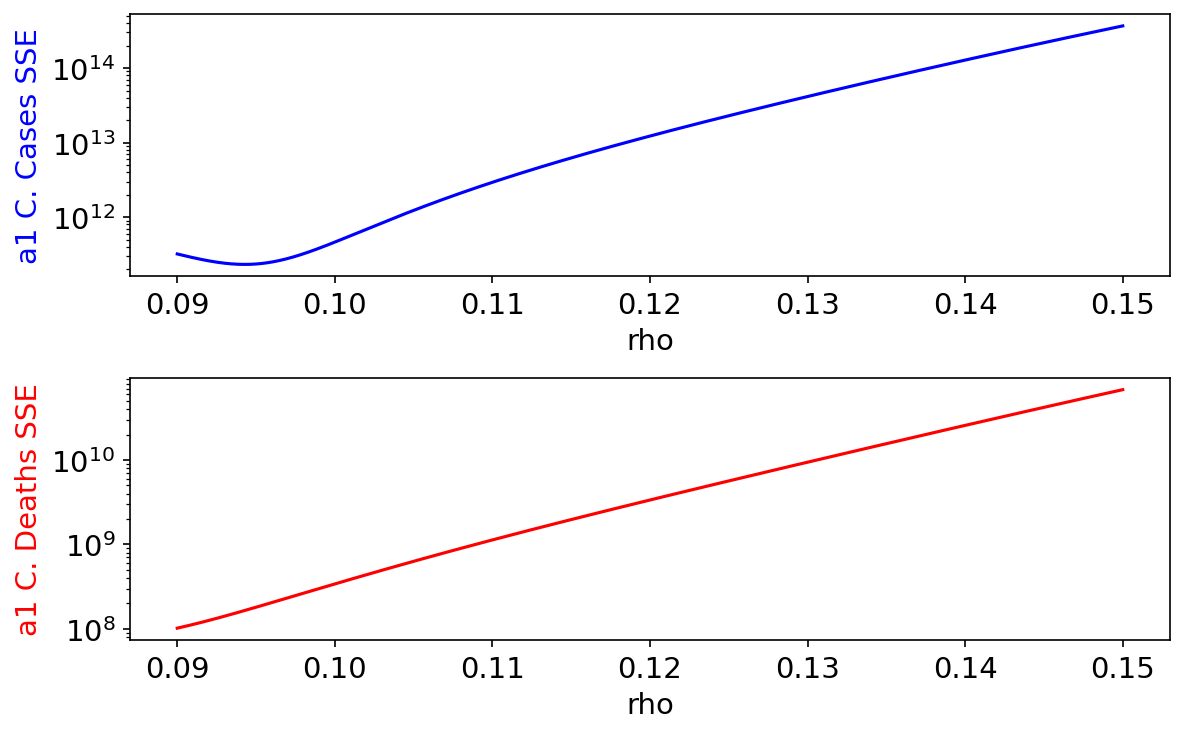

In [67]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5), dpi = 150)
ax1[0].plot(rho_val, E_C1, color = 'blue')
ax1[1].plot(rho_val, E_D1, color = 'red')

#Note that we set our scale to be logarithmic:
ax1[0].set_yscale('log')
ax1[1].set_yscale('log')

#Plus some aesthetics
fs=14
ax1[0].set_xlabel('rho', fontsize = fs)
ax1[0].set_ylabel('a1 C. Cases SSE', fontsize = fs, color = 'blue')

ax1[1].set_xlabel('rho', fontsize = fs)
ax1[1].set_ylabel('a1 C. Deaths SSE', fontsize = fs, color = 'red')

ax1[0].tick_params(axis='both', which='major', labelsize=fs)
ax1[1].tick_params(axis='both', which='major', labelsize=fs)

fig.tight_layout()

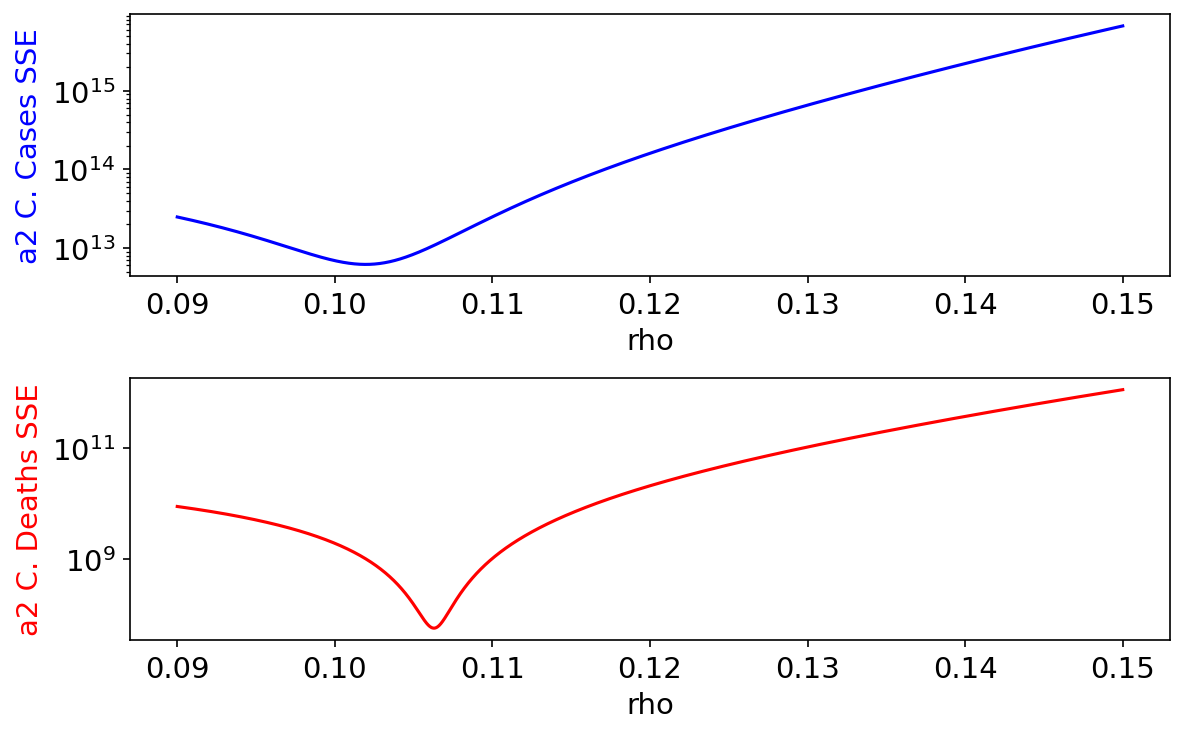

In [68]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5), dpi = 150)

ax1[0].plot(rho_val, E_C2, color = 'blue')
ax1[1].plot(rho_val, E_D2, color = 'red')

#Note that we set our scale to be logarithmic:
ax1[0].set_yscale('log')
ax1[1].set_yscale('log')

#Plus some aesthetics
fs=14
ax1[0].set_xlabel('rho', fontsize = fs)
ax1[0].set_ylabel('a2 C. Cases SSE', fontsize = fs, color = 'blue')

ax1[1].set_xlabel('rho', fontsize = fs)
ax1[1].set_ylabel('a2 C. Deaths SSE', fontsize = fs, color = 'red')

ax1[0].tick_params(axis='both', which='major', labelsize=fs)
ax1[1].tick_params(axis='both', which='major', labelsize=fs)

fig.tight_layout()

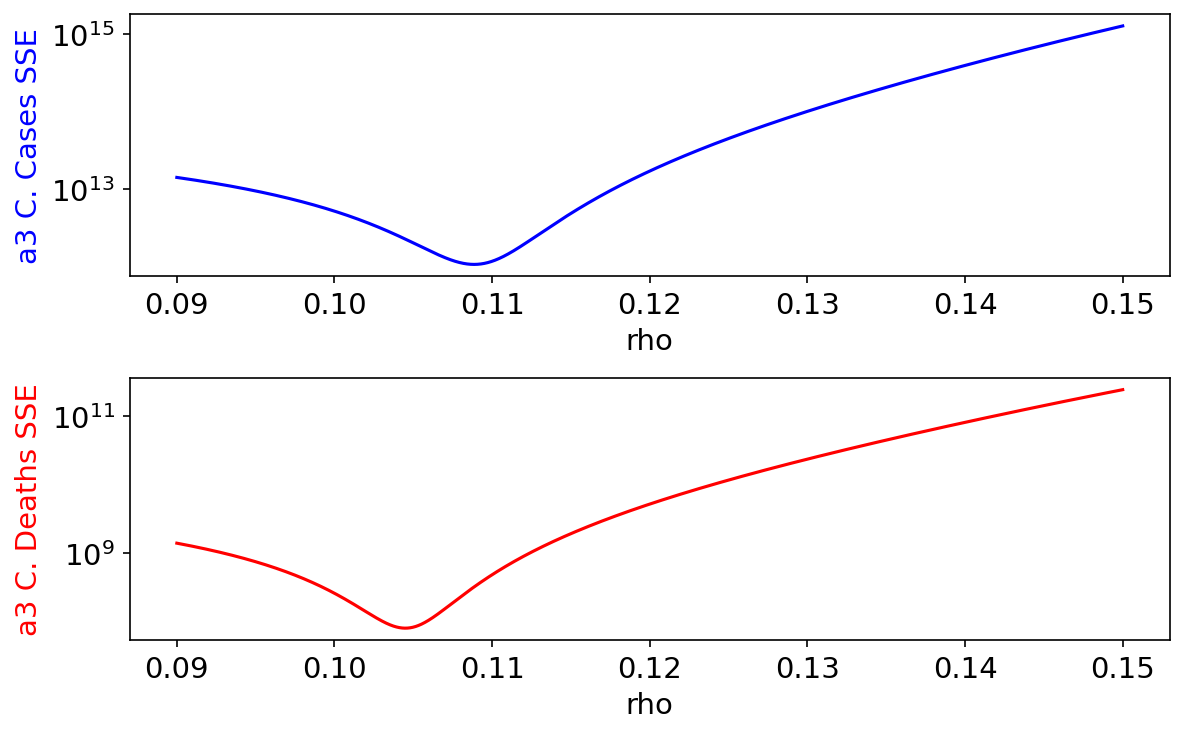

In [69]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5), dpi = 150)

ax1[0].plot(rho_val, E_C3, color = 'blue')
ax1[1].plot(rho_val, E_D3, color = 'red')

#Note that we set our scale to be logarithmic:
ax1[0].set_yscale('log')
ax1[1].set_yscale('log')

#Plus some aesthetics
fs=14
ax1[0].set_xlabel('rho', fontsize = fs)
ax1[0].set_ylabel('a3 C. Cases SSE', fontsize = fs, color = 'blue')

ax1[1].set_xlabel('rho', fontsize = fs)
ax1[1].set_ylabel('a3 C. Deaths SSE', fontsize = fs, color = 'red')

ax1[0].tick_params(axis='both', which='major', labelsize=fs)
ax1[1].tick_params(axis='both', which='major', labelsize=fs)

fig.tight_layout()

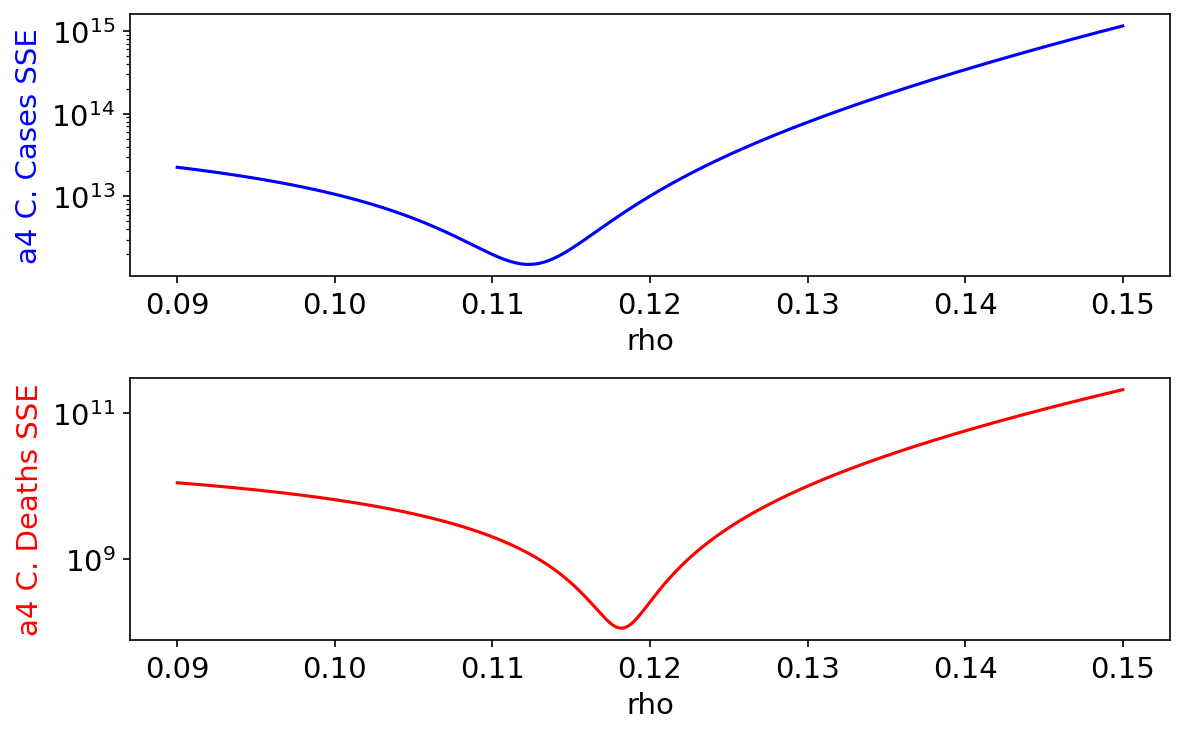

In [70]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5), dpi = 150)

ax1[0].plot(rho_val, E_C4, color = 'blue')
ax1[1].plot(rho_val, E_D4, color = 'red')

#Note that we set our scale to be logarithmic:
ax1[0].set_yscale('log')
ax1[1].set_yscale('log')

#Plus some aesthetics
fs=14
ax1[0].set_xlabel('rho', fontsize = fs)
ax1[0].set_ylabel('a4 C. Cases SSE', fontsize = fs, color = 'blue')

ax1[1].set_xlabel('rho', fontsize = fs)
ax1[1].set_ylabel('a4 C. Deaths SSE', fontsize = fs, color = 'red')

ax1[0].tick_params(axis='both', which='major', labelsize=fs)
ax1[1].tick_params(axis='both', which='major', labelsize=fs)

fig.tight_layout()

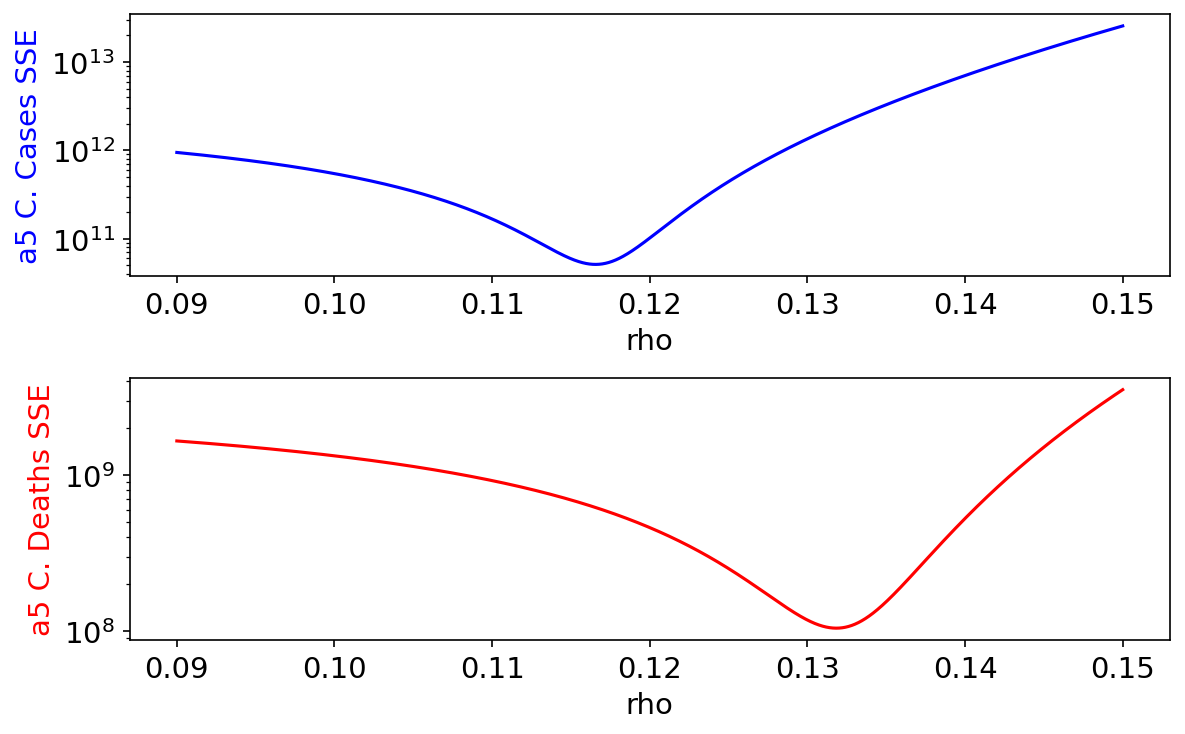

In [71]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5), dpi = 150)

ax1[0].plot(rho_val, E_C5, color = 'blue')
ax1[1].plot(rho_val, E_D5, color = 'red')

#Note that we set our scale to be logarithmic:
ax1[0].set_yscale('log')
ax1[1].set_yscale('log')

#Plus some aesthetics
fs=14
ax1[0].set_xlabel('rho', fontsize = fs)
ax1[0].set_ylabel('a5 C. Cases SSE', fontsize = fs, color = 'blue')

ax1[1].set_xlabel('rho', fontsize = fs)
ax1[1].set_ylabel('a5 C. Deaths SSE', fontsize = fs, color = 'red')

ax1[0].tick_params(axis='both', which='major', labelsize=fs)
ax1[1].tick_params(axis='both', which='major', labelsize=fs)

fig.tight_layout()

In [72]:
indexc1 = np.argmin(E_C1)
indexd1 = np.argmin(E_D1)

indexc2 = np.argmin(E_C2)
indexd2 = np.argmin(E_D2)

indexc3 = np.argmin(E_C3)
indexd3 = np.argmin(E_D3)

indexc4 = np.argmin(E_C4)
indexd4 = np.argmin(E_D4)

indexc5 = np.argmin(E_C5)
indexd5 = np.argmin(E_D5)

print("The estimated rho for cases for a1 is ", rho_val[indexc1])
print("The estimated rho for deaths for a1 is ", rho_val[indexd1])

print("The estimated rho for cases for a2 is ", rho_val[indexc2])
print("The estimated rho for deaths for a2 is ", rho_val[indexd2])

print("The estimated rho for cases for a3 is ", rho_val[indexc3])
print("The estimated rho for deaths for a3 is ", rho_val[indexd3])

print("The estimated rho for cases for a4 is ", rho_val[indexc4])
print("The estimated rho for deaths for a4 is ", rho_val[indexd4])

print("The estimated rho for cases for a5 is ", rho_val[indexc5])
print("The estimated rho for deaths for a5 is ", rho_val[indexd5])

The estimated rho for cases for a1 is  0.09428485697139427
The estimated rho for deaths for a1 is  0.09
The estimated rho for cases for a2 is  0.10195439087817564
The estimated rho for deaths for a2 is  0.10628725745149029
The estimated rho for cases for a3 is  0.10885577115423084
The estimated rho for deaths for a3 is  0.10449889977995598
The estimated rho for cases for a4 is  0.1123004600920184
The estimated rho for deaths for a4 is  0.11818163632726544
The estimated rho for cases for a5 is  0.11656131226245249
The estimated rho for deaths for a5 is  0.1318403680736147


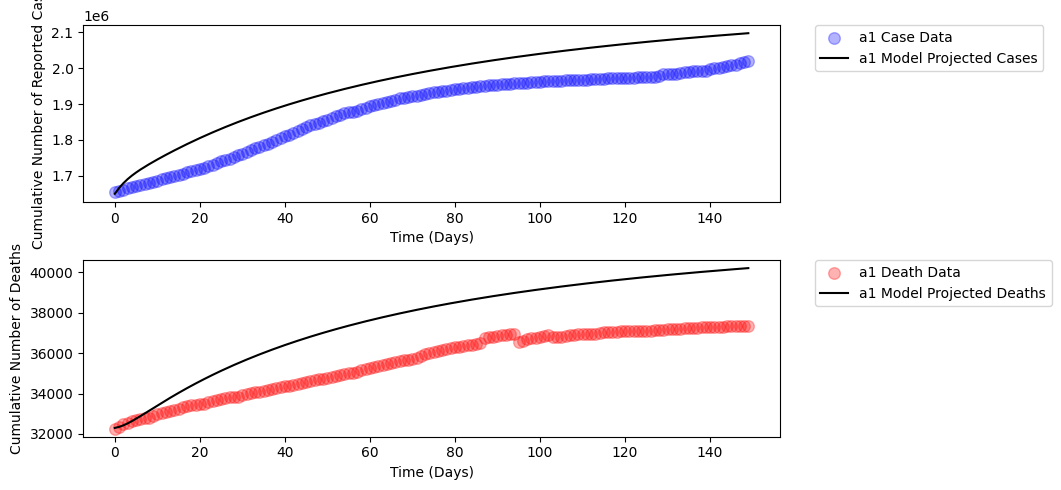

In [73]:


gammai1 = rho_val[indexd1]/N_list[0] # rate of susceptibles exposed by infected
gammaa1 = .8*gammai1 # rate of susceptibles exposed by asymptomatic
gammavi1 = (1-alpha)*gammai1
gammava1 = (1-alpha)*gammaa1

gammai2 = rho_val[indexd2]/N_list[1] # rate of susceptibles exposed by infected
gammaa2 = .8*gammai2 # rate of susceptibles exposed by asymptomatic
gammavi2 = (1-alpha)*gammai2
gammava2 = (1-alpha)*gammaa2

gammai3 = rho_val[indexd3]/N_list[2] # rate of susceptibles exposed by infected
gammaa3 = .8*gammai3 # rate of susceptibles exposed by asymptomatic
gammavi3 = (1-alpha)*gammai3
gammava3 = (1-alpha)*gammaa3

gammai4 = rho_val[indexd4]/N_list[3] # rate of susceptibles exposed by infected
gammaa4 = .8*gammai4 # rate of susceptibles exposed by asymptomatic
gammavi4 = (1-alpha)*gammai4
gammava4 = (1-alpha)*gammaa4

gammai5 = rho_val[indexd5]/N_list[4] # rate of susceptibles exposed by infected
gammaa5 = .8*gammai5 # rate of susceptibles exposed by asymptomatic
gammavi5 = (1-alpha)*gammai5
gammava5 = (1-alpha)*gammaa5

parameters = [b1, b2, b3, b4, b5, beta, gammaa1, gammai1, gammava1, gammavi1,
          gammaa2, gammai2, gammava2, gammavi2, gammaa3, gammai3, gammava3, gammavi3,
          gammaa4, gammai4, gammava4, gammavi4, gammaa5, gammai5, gammava5, gammavi5,
          lambdaa, lambdai, mu, mu_c, nu, phi, sigma, theta1, theta2, theta3, theta4, theta5]


X = odeint(modelcd, x0, times, args=(*parameters,))




#Plot...
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,0], c='blue', s = 70, alpha=.3, label = "a1 Case Data")
ax1[0].plot(T, X[:,7], c='black', label = "a1 Model Projected Cases")
ax1[1].scatter(T, death_data[:,0], c='red', s = 70, alpha=.3, label = "a1 Death Data")
ax1[1].plot(T, X[:,6], c='black', label = "a1 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

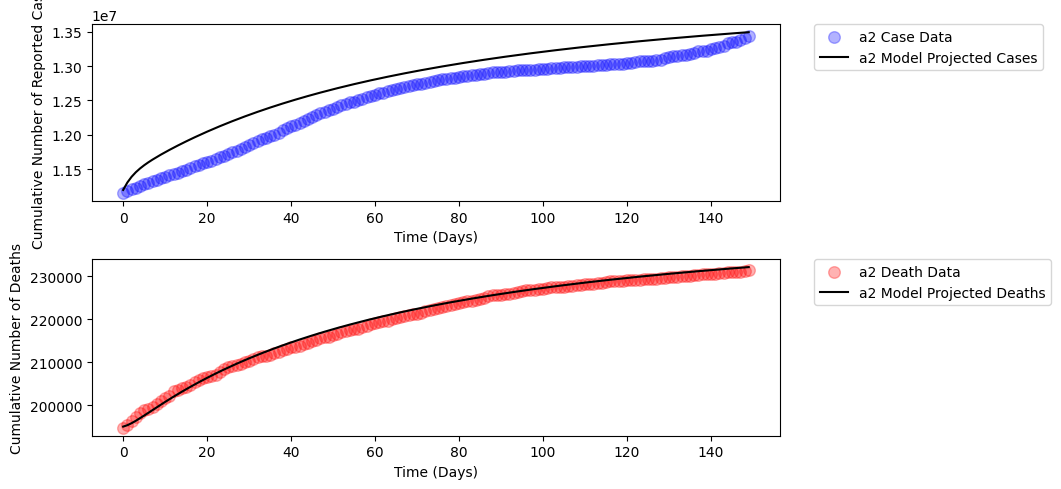

In [74]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,1], c='blue', s = 70, alpha=.3, label = "a2 Case Data")
ax1[0].plot(T, X[:,15], c='black', label = "a2 Model Projected Cases")
ax1[1].scatter(T, death_data[:,1], c='red', s = 70, alpha=.3, label = "a2 Death Data")
ax1[1].plot(T, X[:,14], c='black', label = "a2 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

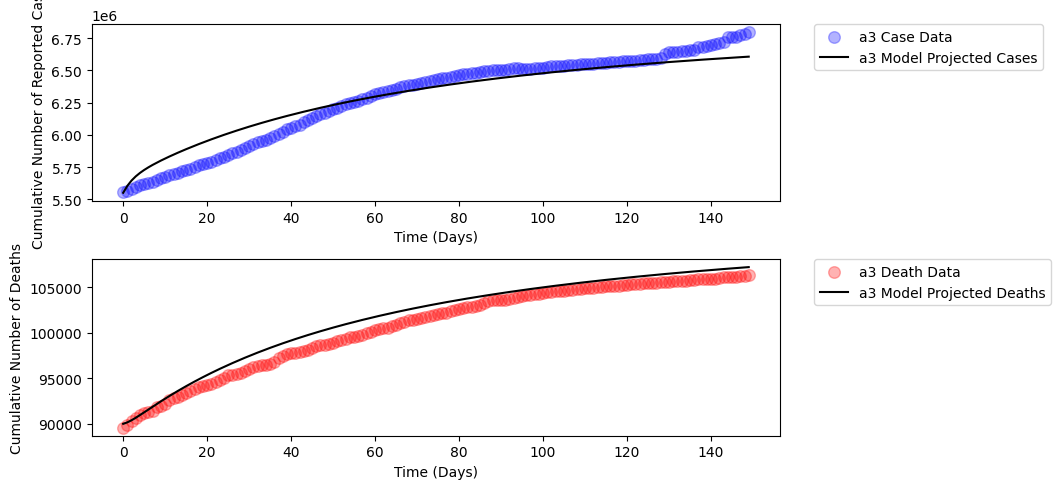

In [75]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,2], c='blue', s = 70, alpha=.3, label = "a3 Case Data")
ax1[0].plot(T, X[:,23], c='black', label = "a3 Model Projected Cases")
ax1[1].scatter(T, death_data[:,2], c='red', s = 70, alpha=.3, label = "a3 Death Data")
ax1[1].plot(T, X[:,22], c='black', label = "a3 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

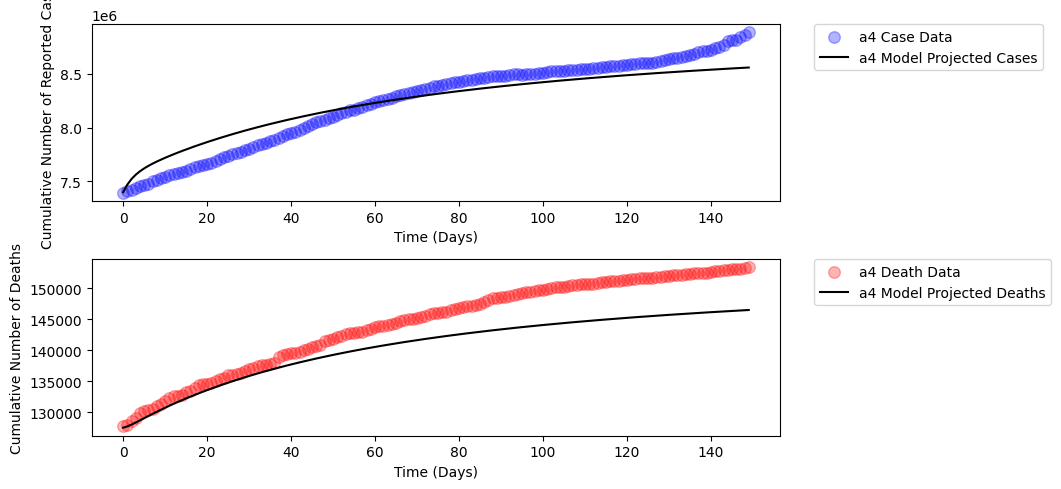

In [76]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,3], c='blue', s = 70, alpha=.3, label = "a4 Case Data")
ax1[0].plot(T, X[:,31], c='black', label = "a4 Model Projected Cases")
ax1[1].scatter(T, death_data[:,3], c='red', s = 70, alpha=.3, label = "a4 Death Data")
ax1[1].plot(T, X[:,30], c='black', label = "a4 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

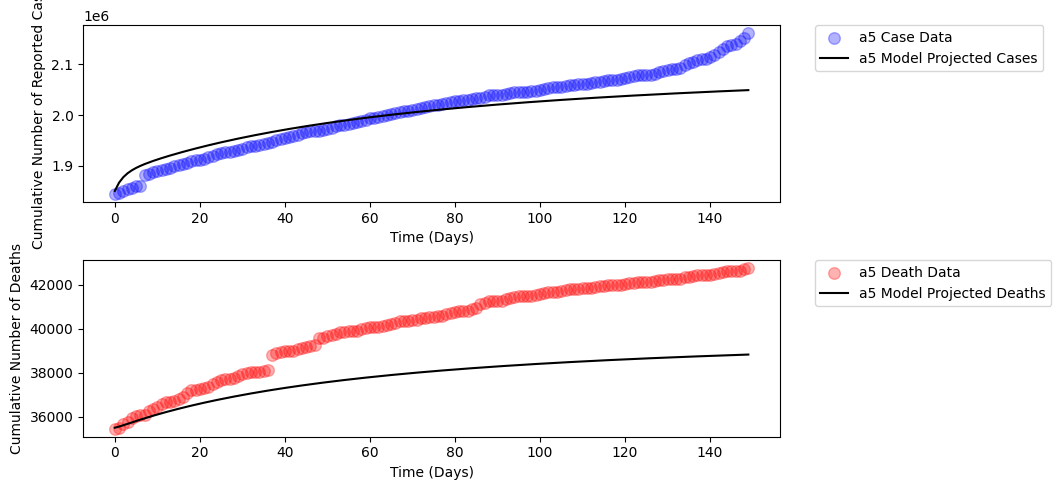

In [77]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,4], c='blue', s = 70, alpha=.3, label = "a5 Case Data")
ax1[0].plot(T, X[:,39], c='black', label = "a5 Model Projected Cases")
ax1[1].scatter(T, death_data[:,4], c='red', s = 70, alpha=.3, label = "a5 Death Data")
ax1[1].plot(T, X[:,38], c='black', label = "a5 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [78]:
resc, resd = run_nlsfit(x0, parameters, T, X)

NameError: name 'run_nlsfit' is not defined

In [ ]:
fig1, ax2 = plt.subplots(2, 1, figsize=(8,5))

ax2[0].stem(T, resc, basefmt = '--', markerfmt = 'ko', linefmt = 'k-', label='Residuals')
ax2[0].legend()
ax2[0].set_title('Cases Residuals');

ax2[1].stem(T, resd, basefmt = '--', markerfmt = 'ko', linefmt = 'k-', label='Residuals')
ax2[1].legend()
ax2[1].set_title('Deaths Residuals');

In [ ]:
#R0


rho1 = rho_val[indexd1]
rho2 = rho_val[indexd2]
rho3 = rho_val[indexd3]
rho4 = rho_val[indexd4]
rho5 = rho_val[indexd5]


#a1 R0

gammai1 = rho1/N1
gammaa1 = gammai1*.8
gammavi1 = gammai1*(1-alpha)
gammava1 = gammaa1*(1-alpha)

denS = mu + b1*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro1 = -beta*theta1*(b1*nu*(gammavi1*(lambdaa+mu)*(sigma-1)-gammava1*(lambdai+mu+mu_c)*sigma)+gammai1*(lambdaa+mu)*(sigma-1)*(mu+phi)-gammaa1*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)


#a2 R0

gammai2 = rho2/N2
gammaa2 = gammai2*.8
gammavi2 = gammai2*(1-alpha)
gammava2 = gammaa2*(1-alpha)

denS = mu + b2*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro2 = -beta*theta2*(b2*nu*(gammavi2*(lambdaa+mu)*(sigma-1)-gammava2*(lambdai+mu+mu_c)*sigma)+gammai2*(lambdaa+mu)*(sigma-1)*(mu+phi)-gammaa2*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)


#a3 R0

gammai3 = rho3/N3
gammaa3 = gammai3*.8
gammavi3 = gammai3*(1-alpha)
gammava3 = gammaa3*(1-alpha)

denS = mu + b3*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro3 = -beta*theta3*(b3*nu*(gammavi3*(lambdaa+mu)*(sigma-1)-gammava3*(lambdai+mu+mu_c)*sigma)+gammai3*(lambdaa+mu)*(sigma-1)*(mu+phi)-gammaa3*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)

#a4 R0

gammai4 = rho4/N4
gammaa4 = gammai4*.8
gammavi4 = gammai4*(1-alpha)
gammava4 = gammaa4*(1-alpha)

denS = mu + b4*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro4 = -beta*theta4*(b4*nu*(gammavi4*(lambdaa+mu)*(sigma-1)-gammava4*(lambdai+mu+mu_c)*sigma)+gammai4*(lambdaa+mu)*(sigma-1)*(mu+phi)-gammaa4*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)

#a5 R0

gammai5 = rho5/N5
gammaa5 = gammai5*.8
gammavi5 = gammai5*(1-alpha)
gammava5 = gammaa5*(1-alpha)

denS = mu + b5*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro5 = -beta*theta5*(b5*nu*(gammavi5*(lambdaa+mu)*(sigma-1)-gammava5*(lambdai+mu+mu_c)*sigma)+gammai5*(lambdaa+mu)*(sigma-1)*(mu+phi)-gammaa5*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)


print("Ro1 = ",Ro1)
print("Ro2 = ",Ro2)
print("Ro3 = ",Ro3)
print("Ro4 = ",Ro4)
print("Ro5 = ",Ro5)
